In [1]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import sys
sys.path.append("..")
from rnn_sin2 import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [2]:
with open('../weights/SIN2_bphebb_32_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [3]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'gain_changes', 'shift_changes', 'init_weight'])

In [4]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])
gain_changes = np.array(weight_history['gain_changes'])
shift_changes = np.array(weight_history['shift_changes'])
init_weight_matrix = np.array(weight_history['init_weight'])
# weights = weight_history['weights']

In [5]:
losses[0]

0.0002785855904221535

In [20]:
output_weight_matrix

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]])

In [21]:
weight_matrix

array([[ 0.        ,  1.42629123,  1.40751231, ..., -1.45710361,
        -1.45811784, -1.45875311],
       [ 1.42626011,  0.        ,  1.39571309, ..., -1.44478738,
        -1.44578981, -1.44641304],
       [ 1.40743172,  1.39567077,  0.        , ..., -1.42554891,
        -1.42654335, -1.42716217],
       ...,
       [ 1.53544188,  1.5224973 ,  1.5022856 , ...,  0.        ,
        -1.5581032 , -1.55878842],
       [ 1.53651571,  1.52356648,  1.50332856, ..., -1.55810511,
         0.        , -1.55990028],
       [ 1.53719151,  1.52423286,  1.50398278, ..., -1.55879927,
        -1.55990744,  0.        ]])

<Axes: >

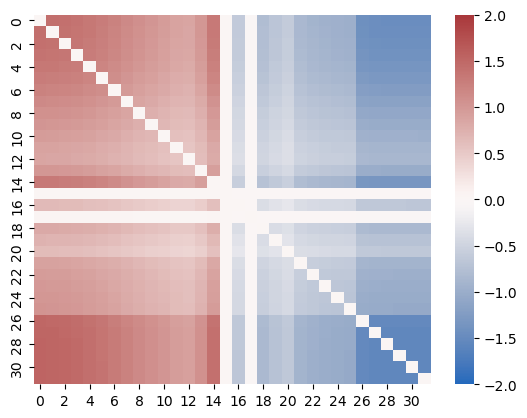

In [22]:
sns.heatmap(weight_matrix, vmax=2, vmin=-2, cmap='vlag')

## Defining Network

In [23]:
time_constant = 100 #ms
timestep = 10 #ms
ndata = 400
time = ndata * timestep #ms
num_inputs = 1
num_nodes = 32
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 400/400 [00:00<00:00, 23705.00it/s]


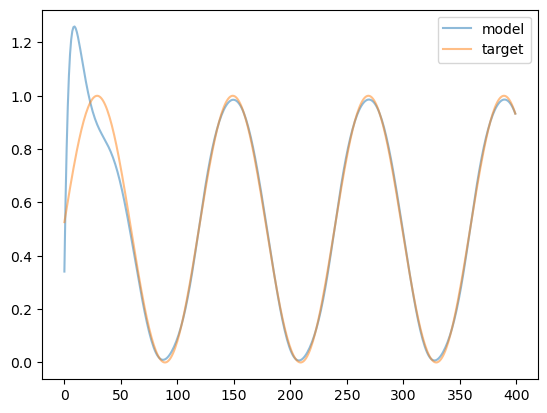

In [24]:
time_points = np.arange(ndata).reshape(-1, 1)
inputs = (1 + np.sin(time_points/60*np.pi))/2
targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

outputs, activations = network.simulate(time, torch.tensor(inputs).float())
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
# plt.ylim([0,1])
plt.legend()
# plt.savefig("fig/sin_oja_train.png")

100%|██████████| 300/300 [00:00<00:00, 19592.84it/s]


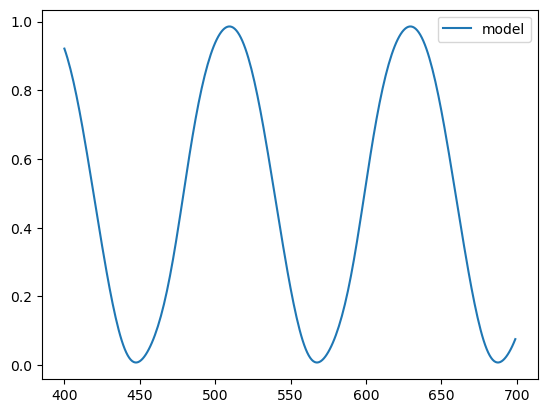

In [25]:
time_pred = 3000
time_points_pred = np.arange(400,700).reshape(-1, 1)
inputs_pred = (1 + np.sin(time_points_pred/60*np.pi))/2

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float())
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
# plt.ylim([0,1])
plt.legend()
# plt.savefig("fig/sin_oja_pred.png")

(0.0, 0.01)

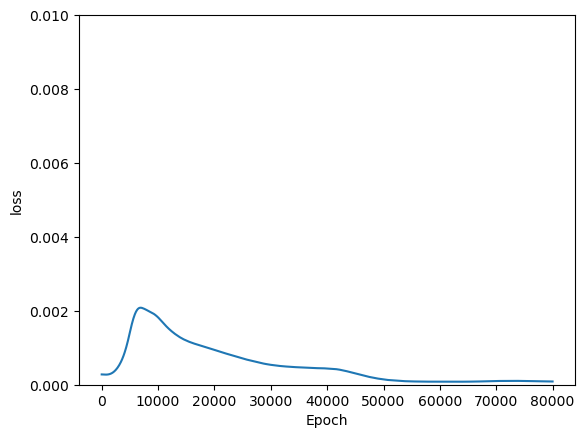

In [26]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.01])
# plt.savefig("fig/sin_oja_loss.png")

Text(0, 0.5, 'gain changes')

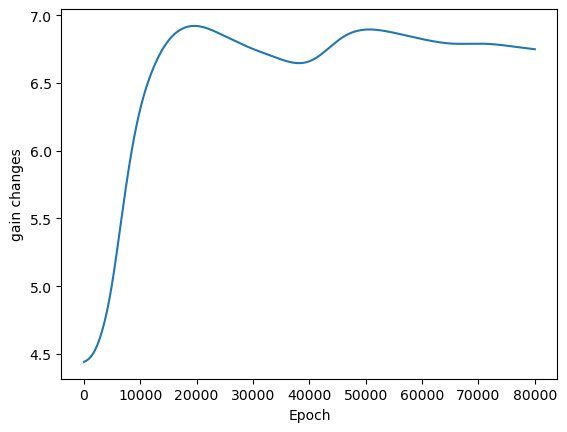

In [27]:
plt.plot(np.arange(len(gain_changes)), gain_changes)
plt.xlabel("Epoch")
plt.ylabel("gain changes")
# plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_gainchange.png")

Text(0, 0.5, 'shift changes')

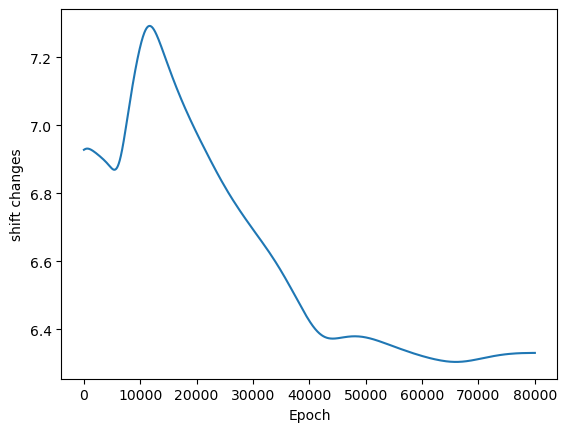

In [28]:
plt.plot(np.arange(len(shift_changes)), shift_changes)
plt.xlabel("Epoch")
plt.ylabel("shift changes")
# plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_gainchange.png")

In [29]:
# plt.plot(np.arange(len(weight_sums)), weight_sums)
# plt.xlabel("Epoch")
# plt.ylabel("weight sums")
# # plt.ylim([0,0.5])
# # plt.savefig("fig/sin_oja_weightsum.png")

In [30]:
a = torch.tensor(np.random.random(size=(16,16)))
delta = torch.matmul(a[:,0:-1], a[:,1::].T)
delta

tensor([[4.8056, 3.8294, 4.3935, 3.0594, 4.6042, 5.0145, 4.0961, 2.9196, 3.8744,
         4.0221, 5.1990, 3.9266, 4.4320, 5.1385, 4.8982, 4.9147],
        [4.1606, 3.0111, 3.6182, 2.7663, 3.6993, 3.5413, 3.0571, 2.0827, 2.8707,
         3.5032, 3.6290, 2.7983, 3.3658, 3.4752, 3.8382, 4.1130],
        [4.9819, 3.5541, 4.2857, 3.7524, 4.3349, 4.8705, 3.8173, 2.3631, 3.4546,
         4.1960, 4.5828, 3.5877, 4.7183, 4.4899, 4.7064, 4.8204],
        [3.4061, 3.4725, 3.4171, 2.6087, 3.8452, 3.0806, 2.9217, 2.0332, 3.0304,
         3.9664, 4.0091, 2.9379, 3.0870, 3.6863, 4.0807, 3.4802],
        [4.1381, 3.6933, 3.9343, 2.8808, 4.0014, 4.1553, 4.1293, 2.1291, 3.1965,
         4.6039, 5.1081, 3.3076, 3.6169, 3.9970, 4.1540, 4.1484],
        [4.6256, 3.3235, 4.0753, 4.0282, 4.6317, 4.4401, 3.9287, 2.3854, 3.5337,
         3.9193, 5.4883, 3.2072, 4.1556, 4.2301, 4.6026, 4.7705],
        [3.9090, 3.3146, 4.0704, 3.2227, 4.3888, 3.9016, 3.0901, 2.3866, 3.1310,
         3.8412, 4.1914, 2.8870, 3.87

<Axes: >

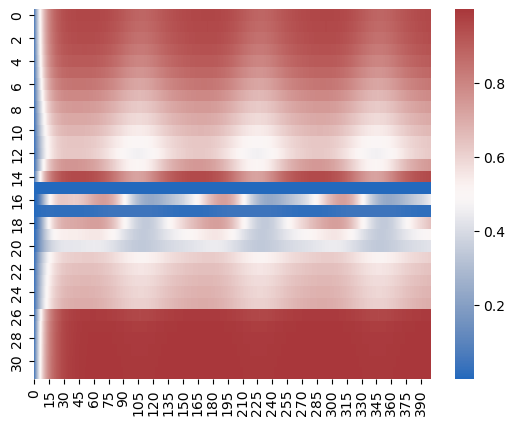

In [31]:
activates_t = activations.detach().numpy().T
sns.heatmap(activates_t, cmap='vlag')

<Axes: >

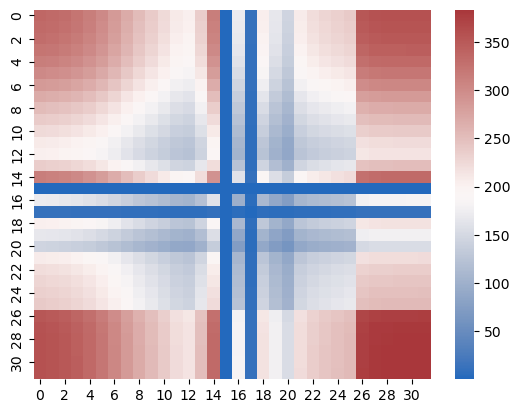

In [32]:
hebb_up = activates_t[:,0:-1] @ activates_t[:,1::].T
sns.heatmap(hebb_up, cmap='vlag')

<Axes: >

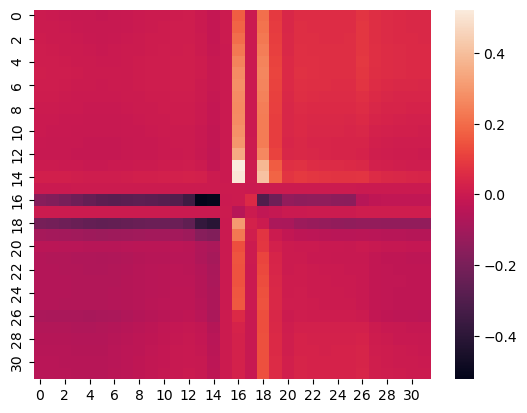

In [33]:
sns.heatmap(hebb_up - hebb_up.T)

<Axes: >

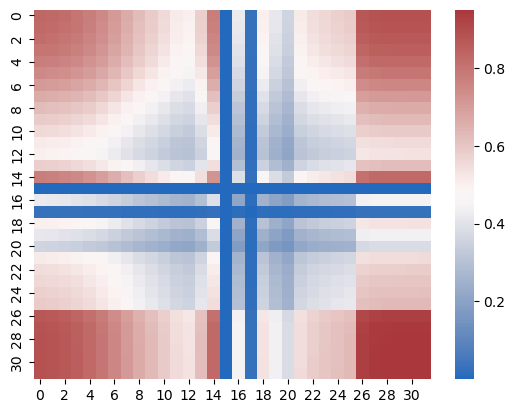

In [34]:
act_mean = activates_t.mean(axis=1).reshape(-1,1)
hebb_up2 = act_mean @ act_mean.T
sns.heatmap(hebb_up2, cmap='vlag')

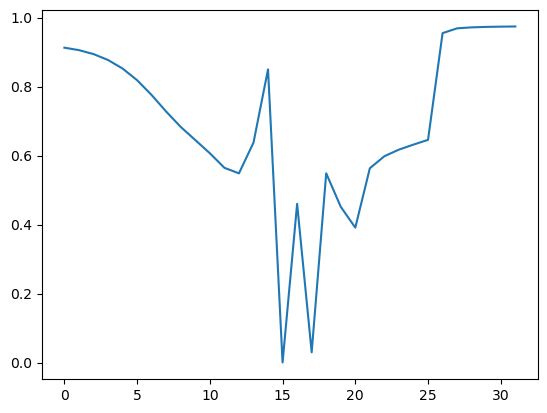

In [35]:
plt.plot(act_mean)

<Axes: >

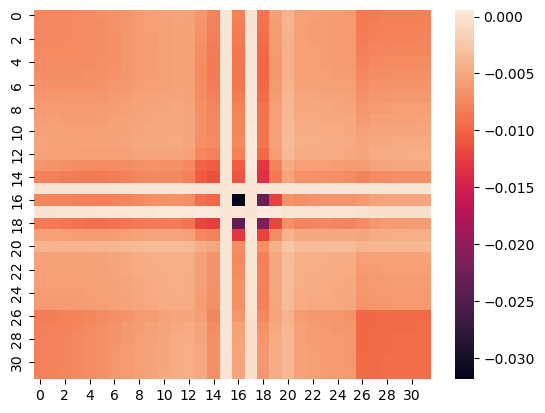

In [36]:
sns.heatmap(hebb_up2 - hebb_up/400)